### Decision Trees

## Fitting a Decision Tree

In [47]:
# importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
# for visualisation
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import export_graphviz
from IPython.display import Image  
from subprocess import call


In [48]:
# importing the dataset
iris = load_iris()

X = iris.data[:, ]
y = iris.target

r = 4
X_train, X_test, y_train, y_test = train_test_split(X, 
                y, test_size=0.25, random_state=r)

In [49]:
# training a model without pruning
unpruned = DecisionTreeClassifier(max_depth=None, random_state=r)
unpruned.fit(X_train, y_train)
print("Performance without pruning:", unpruned.score(X_test, y_test))
print("At depth:", unpruned.tree_.max_depth)

Performance without pruning: 0.9736842105263158
At depth: 4


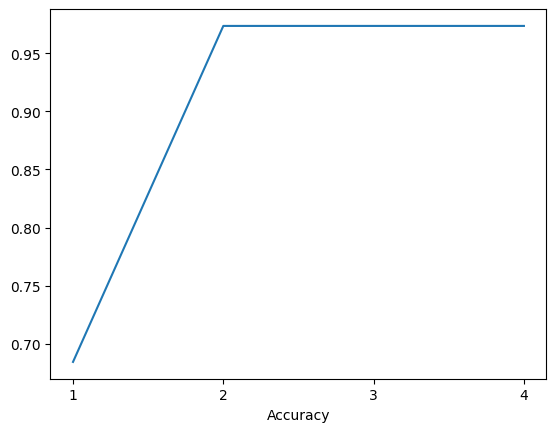

In [50]:
# looking at effect of pruning   
pruned_depths = range(1,unpruned.tree_.max_depth+1)

pruned_scores = [] 
for d in pruned_depths:
  clf = DecisionTreeClassifier(max_depth=d, random_state=r)
  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)
  pruned_scores.append(score)

fig, ax = plt.subplots()
ax.plot(pruned_depths, pruned_scores)
plt.xlabel("Max_depth values")
plt.xlabel("Accuracy")
ax.xaxis.set_ticks(pruned_depths)
plt.show()

In [51]:
# fitting the chosen tree
best_depth = pruned_depths[np.argmax(pruned_scores)]
print('Best performance reached at depth of:', best_depth)

pruned = DecisionTreeClassifier(max_depth=best_depth)
pruned.fit(X, y)

Best performance reached at depth of: 2


DecisionTreeClassifier(max_depth=2)

## Visualisation





### Visualise tree
We can visualise our tree using either Sklearn or Graphviz. The Sklearn tree is very simple in appearance while the Graphviz tree has better aesthetics. However, Graphviz is a little tricky to install, so using it is completely optional. 

If you wish to use Graphviz, follow the install instructions here: https://graphviz.readthedocs.io/en/stable/manual.html and set graphviz_installed = True in the code below.

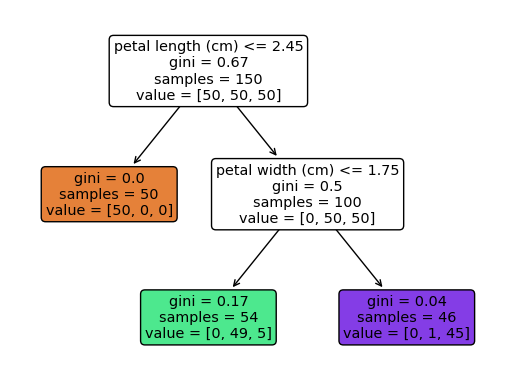

In [52]:
graphviz_installed = False

if (graphviz_installed):
  export_graphviz(pruned, out_file='pruned_tree.dot', feature_names = iris.feature_names,
                  rounded = True, proportion = False, precision = 2, filled = True)
  
  # Convert to png using system command
  call(['dot', '-Tpng', 'pruned_tree.dot', '-o', 'pruned_tree.png', '-Gdpi=600'])
  
else: 
  fig = plt.figure()
  tree.plot_tree(pruned,feature_names = iris.feature_names, 
                     rounded = True, proportion = False, precision = 2, filled = True) #display tree
  fig.savefig('pruned_tree.png')
  
#Image(filename = 'pruned_tree.png', width=400) #uncomment if using graphviz



### How to visualise the decison tree on a scatter plot.

By visualising our decision tree's prediction on a scatter plot we can see how the model gets more and more specific as the depth of the tree increases.

In [53]:
# isolate only 2 features (sepal width and length) to allow visualisation on a 2d scale
X_sep = iris.data[:,[0,1]]

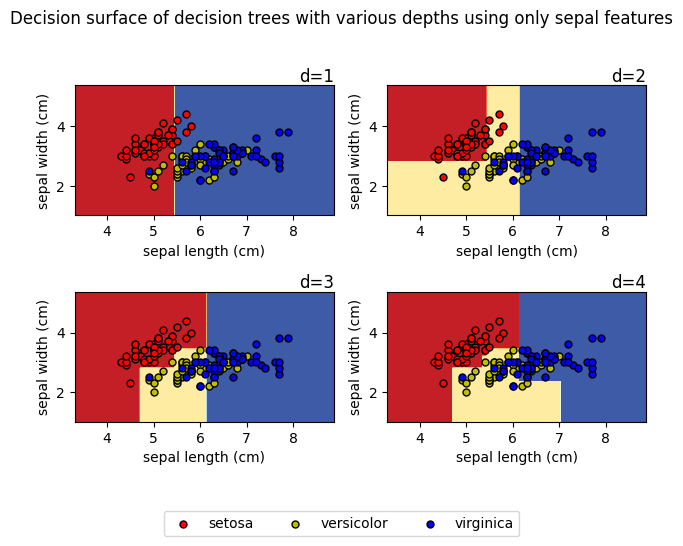

In [54]:
plt.suptitle("Decision surface of decision trees with various depths using only sepal features")

# make subplots for each depth
for idx, d in enumerate(pruned_depths):
    ax = plt.subplot(2, 2, idx + 1)

    x_min, x_max = X_sep[:, 0].min() - 1, X_sep[:, 0].max() + 1
    y_min, y_max = X_sep[:, 1].min() - 1, X_sep[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    clf = DecisionTreeClassifier(max_depth=d).fit(X_sep, y)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = ax.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    ax.set_xlabel(iris.feature_names[0])
    ax.set_ylabel(iris.feature_names[1])
    ax.set_title('d={}'.format(d), loc='right', pad=-15)

    # Plot the training points
    for i, color in zip(range(3), "ryb"):
        idx = np.where(y == i)
        ax.scatter(X_sep[idx, 0], X_sep[idx, 1], c=color, label=iris.target_names[i],
                   edgecolor='black', s=25)

handles, labels = ax.get_legend_handles_labels()
fig = plt.gcf()
fig.legend(handles, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, -0.05))

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



In [55]:
#Practical Task 21: Titanic dataset Random Forest
#Load the Titanic dataset
data = pd.read_csv('titanic.csv')

In [56]:
# Preprocess data
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].fillna('S')
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Fare'] = data['Fare'].fillna(data['Fare'].median())

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = data[features]
y = data['Survived']

In [58]:
data.describe()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208,0.361392
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.635673
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [59]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [60]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Bagged Tree
bagged_tree = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagged_tree.fit(X_train, y_train)
y_pred_bagged = bagged_tree.predict(X_test)
bagged_accuracy = accuracy_score(y_test, y_pred_bagged)

In [62]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

In [63]:
# Boosted Tree
boosted_tree = GradientBoostingClassifier(n_estimators=100, random_state=42)
boosted_tree.fit(X_train, y_train)
y_pred_boosted = boosted_tree.predict(X_test)
boosted_accuracy = accuracy_score(y_test, y_pred_boosted)

In [64]:
# Feature importance from Random Forest
importances = random_forest.feature_importances_
feature_importance = pd.DataFrame({'feature': features, 'importance': importances})
feature_importance = feature_importance.sort_values(by='importance', ascending=False)
print(feature_importance)

    feature  importance
5      Fare    0.269744
1       Sex    0.268418
2       Age    0.256426
0    Pclass    0.081891
3     SibSp    0.052077
4     Parch    0.037390
6  Embarked    0.034054


The feature importance analysis above shows that some features such as 'Emabarked' or Parch can be dropped as they contributed very little to the outcomes of the classification.

In [65]:
# Tune Random Forest parameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [66]:
# Feature importance from Random Forest
importances = random_forest.feature_importances_
feature_importance = pd.DataFrame({'feature': features, 'importance': importances})
feature_importance = feature_importance.sort_values(by='importance', ascending=False)
print(feature_importance)


    feature  importance
5      Fare    0.269744
1       Sex    0.268418
2       Age    0.256426
0    Pclass    0.081891
3     SibSp    0.052077
4     Parch    0.037390
6  Embarked    0.034054


In [67]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate best model
y_pred_best_rf = best_model.predict(X_test)
best_rf_accuracy = accuracy_score(y_test, y_pred_best_rf)


In [68]:
# Report results
print(f"Bagged Tree Accuracy: {bagged_accuracy}")
print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Boosted Tree Accuracy: {boosted_accuracy}")
print(f"Best Random Forest Accuracy: {best_rf_accuracy}")
print(f"Best Parameters for Random Forest: {best_params}")

Bagged Tree Accuracy: 0.8044692737430168
Random Forest Accuracy: 0.8268156424581006
Boosted Tree Accuracy: 0.8044692737430168
Best Random Forest Accuracy: 0.8212290502793296
Best Parameters for Random Forest: {'max_depth': 10, 'n_estimators': 50}


Conclusion
The performance of different ensemble methods was evaluated on the given dataset. The accuracy results for each method were as follows:

Bagged Tree Accuracy: 80.45%
Random Forest Accuracy: 82.68%
Boosted Tree Accuracy: 80.45%
Best Random Forest Accuracy: 82.12% (with parameters: max_depth = 10, n_estimators = 50)
Among the methods tested, the Random Forest classifier achieved the highest accuracy at 82.68%, indicating its superior ability to generalize on the dataset. The Boosted Tree and Bagged Tree methods both showed comparable performance, each with an accuracy of 80.45%.

The optimal parameters for the Random Forest were found to be a maximum depth of 10 and 50 estimators, resulting in an accuracy of 82.12%. This indicates that the Random Forest model can further improve performance when appropriately tuned.

In summary, the Random Forest method proved to be the most effective ensemble technique for this dataset, providing the highest accuracy and demonstrating the importance of parameter tuning in achieving optimal model performance.
